In [5]:
acc <- read.table("../Data/trafficAccident_2011_2019.txt", fileEncoding = "UTF-8", header = T, stringsAsFactors =  F)
seoul <- read.csv("../Data/newSeoul2019.csv", fileEncoding = "UTF-8")
head(acc)
head(seoul)

기간,자치구별,구분,합계,X1월,X2월,X3월,X4월,X5월,X6월,X7월,X8월,X9월,X10월,X11월,X12월
2011,합계,발생건수,"40,451","3,038","2,573","3,126","3,450","3,603","3,390","3,529","3,360","3,433","3,734","3,701","3,514"
2011,합계,사망자수,435,36,32,20,44,36,37,36,50,37,25,40,42
2011,합계,부상자수,"57,625","4,429","3,734","4,513","4,905","5,036","4,831","5,067","4,823","4,893","5,244","5,150","5,000"
2011,종로구,발생건수,"1,421",115,99,116,110,122,116,103,122,121,135,140,122
2011,종로구,사망자수,14,2,-,-,1,-,3,1,1,2,2,1,1
2011,종로구,부상자수,"1,994",165,134,162,153,157,163,154,171,166,193,204,172


년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [6]:
str(acc)
str(seoul)

'data.frame':	702 obs. of  16 variables:
 $ 기간    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 자치구별: chr  "합계" "합계" "합계" "종로구" ...
 $ 구분    : chr  "발생건수" "사망자수" "부상자수" "발생건수" ...
 $ 합계    : chr  "40,451" "435" "57,625" "1,421" ...
 $ X1월    : chr  "3,038" "36" "4,429" "115" ...
 $ X2월    : chr  "2,573" "32" "3,734" "99" ...
 $ X3월    : chr  "3,126" "20" "4,513" "116" ...
 $ X4월    : chr  "3,450" "44" "4,905" "110" ...
 $ X5월    : chr  "3,603" "36" "5,036" "122" ...
 $ X6월    : chr  "3,390" "37" "4,831" "116" ...
 $ X7월    : chr  "3,529" "36" "5,067" "103" ...
 $ X8월    : chr  "3,360" "50" "4,823" "122" ...
 $ X9월    : chr  "3,433" "37" "4,893" "121" ...
 $ X10월   : chr  "3,734" "25" "5,244" "135" ...
 $ X11월   : chr  "3,701" "40" "5,150" "140" ...
 $ X12월   : chr  "3,514" "42" "5,000" "122" ...
'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 

In [7]:
library(dplyr)
library(stringr)

In [8]:
# 발생건수, 사망자수, 부상자수
acc2 <- subset(acc, 자치구별 != "합계") # 팔요없는 데이터 삭제
acc2 <- acc2[,-4]

rownames(acc2) <- c()
colnames(acc2) <- c("년도", "자치구명", "구분", 1:12)

for(i in 4:15){
    acc2[,i] <- ifelse(acc2[,i] == '-', 0, acc2[,i])
}
head(acc2)

년도,자치구명,구분,1,2,3,4,5,6,7,8,9,10,11,12
2011,종로구,발생건수,115,99,116,110,122,116,103,122,121,135,140,122
2011,종로구,사망자수,2,0,0,1,0,3,1,1,2,2,1,1
2011,종로구,부상자수,165,134,162,153,157,163,154,171,166,193,204,172
2011,중구,발생건수,108,86,141,128,121,115,119,117,140,147,132,143
2011,중구,사망자수,0,0,0,3,1,1,1,1,1,2,3,0
2011,중구,부상자수,159,112,183,175,165,156,154,154,181,203,172,211


In [9]:
# 구분(사망자수, 발생건수, 부상자수) 컬럼화 / 1~12월 컬럼 로우데이터로 변경

# b <- cbind(acc2[1,1], rownames(t(acc2[1,4:15])), acc2[1,2], t(acc2[1,4:15]))
# b <- cbind(b, t(acc2[2,4:15]))
# b <- cbind(b, t(acc2[3,4:15]))
# rownames(b) <- c()
# colnames(b) <- c()

# acc_s <- c()
# for (i in seq(1,nrow(acc2),3) ){ # 1, 4, 7, ....
#    b <- cbind(acc2[i,1], 1:12, acc2[i,2], t(acc2[i,4:15]))
#    b <- cbind(b, t(acc2[i+1,4:15]))
#    b <- cbind(b, t(acc2[i+2,4:15]))
#    rownames(b) <- c()
#    colnames(b) <- c("년도", "월", "자치구명", "발생건수", "사망자수", "부상자수")
#    acc_s <- rbind(acc_s, b)
#}
#head(acc_s)
#head(seoul)

acc_s <- data.frame(년도=integer(), 월=integer(), 자치구명=character(), 발생건수=integer(),
                   사망자수=integer(), 부상자수=integer())
for(i in seq(1, nrow(acc2), 3)){
    년도 <- as.integer(acc2[i,1])
    월 <- 1:12
    자치구명 <- as.character(acc2[i,2])
    발생건수 <- as.integer(t(acc2[i,4:15]))
    사망자수 <- as.integer(t(acc2[i+1, 4:15]))
    부상자수 <- as.integer(t(acc2[i+2, 4:15]))
    
    acc3 <- data.frame(년도, 월, 자치구명, 발생건수, 사망자수, 부상자수)
    acc_s <- rbind(acc_s, acc3)
}

str(acc_s)
head(acc_s)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "종로구","중구",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [12]:
acc_2019 <- acc_s[acc_s[,'년도'] == 2019,]

In [13]:
head(acc_2019)

,년도,월,자치구명,발생건수,사망자수,부상자수
2401,2019,1,종로구,87,1,125
2402,2019,2,종로구,66,1,84
2403,2019,3,종로구,87,2,122
2404,2019,4,종로구,85,0,131
2405,2019,5,종로구,112,1,158
2406,2019,6,종로구,95,1,116


In [14]:
str(acc_2019)

'data.frame':	300 obs. of  6 variables:
 $ 년도    : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "종로구","중구",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  87 66 87 85 112 95 83 115 99 104 ...
 $ 사망자수: int  1 1 2 0 1 1 0 0 0 0 ...
 $ 부상자수: int  125 84 122 131 158 116 109 164 143 139 ...


In [15]:
cor(acc_2019$발생건수, acc_2019$부상자수)

[1] 0.9856482

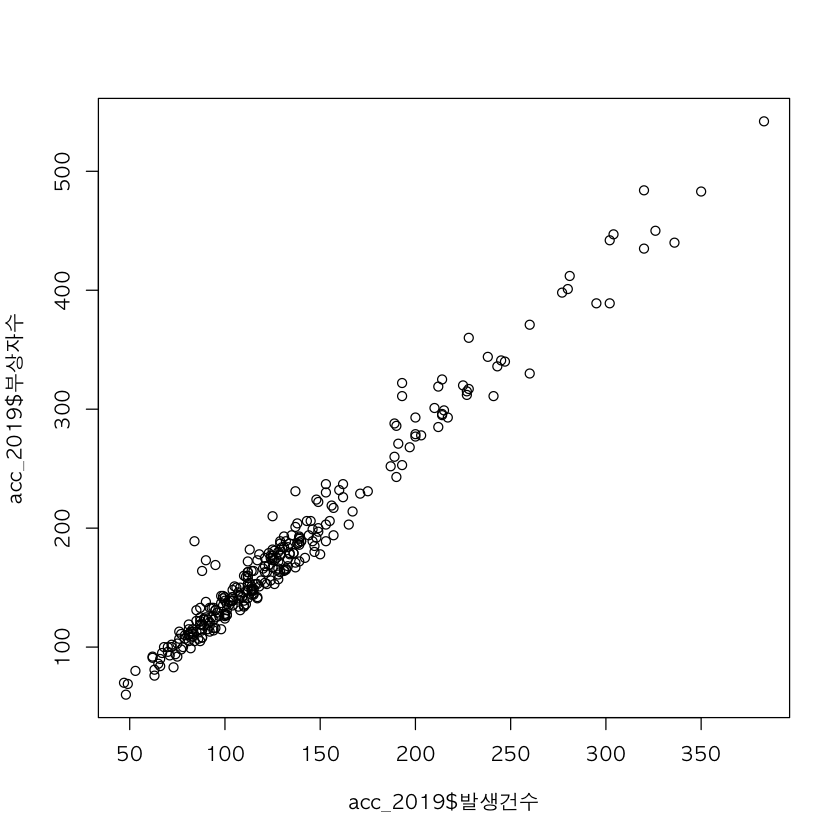

In [19]:
options(warn= -1)
par(family="AppleGothic")
plot(acc_2019$발생건수, acc_2019$부상자수)

In [23]:
library(caret)
library(dplyr)
library(nnet)
library(e1071)
library(randomForest)
library(party)
library(class)
options(warn = -1)

In [32]:
# 

samp <- createDataPartition(acc_2019$부상자수, p=0.7, list=F)
data.tr <- acc_2019[samp,]
data.test <- acc_2019[-samp,]

In [36]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

for (i in 1:5){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -부상자수)
  y_tr <- data.tr$부상자수
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -부상자수)
  y_test <- data.test$부상자수 
    
  # RF
  model_rf <- randomForest(부상자수 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- 1 - (sum((y_test - pred_rf)^2) / sum((y_test - mean(y_test))^2))
  # RF train
  model_rf_tr <- randomForest(부상자수 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- 1 - (sum((y_tr - pred_rf_tr)^2) / sum((y_tr - mean(y_tr))^2))
  
#   # 인공신경망
#   model_nnet <- nnet(부상자수 ~ ., data=data.tr, size=3, trace=FALSE)
#   pred_nnet <- predict(model_nnet, x_test, type="class")
#   예측력_nnet <- mean(pred_nnet == y_test)
#   # 인공신경망 train
#   model_nnet_tr <- nnet(부상자수 ~ ., data=data.tr, size=3, trace=FALSE)
#   pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
#   예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(부상자수 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- 1 - (sum((y_test - pred_ctree)^2) / sum((y_test - mean(y_test))^2))
  # 의사결정나무 train
  model_ctree_tr <- ctree(부상자수 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- 1 - (sum((y_tr - pred_ctree_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
  # SVM test
  model_svm <- svm(부상자수 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "raw")
  예측력_svm <- 1 - (sum((y_test - pred_svm)^2) / sum((y_test - mean(y_test))^2))
  # SVM train
   model_svm_tr <- svm(부상자수 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "raw")
   예측력_svm_tr <- 1 - (sum((y_tr - pred_svm_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
#   # 다항 로지스틱 회귀분석
#    model_multinom <- multinom(부상자수 ~ ., data=data.tr, trace=FALSE)
#    pred_multinom <- predict(model_multinom, x_test, type="class")
#    예측력_multinom <- 1 - (sum((y_test - pred_multinom)^2) / sum((y_test - mean(y_test))^2))
#   # 다항 로지스틱 회귀분석 train
#     model_multinom_tr <- multinom(부상자수 ~ ., data=data.tr, trace=FALSE)
#     pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
#     예측력_multinom_tr <- 1 - (sum((y_tr - pred_multinom_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
#   sum_multi <- sum_multi + 예측력_multinom
#   sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
#   sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
#   sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf/5, "\n")
cat("의사결정나무 : ", sum_ctree/5, "\n")
cat("SVM :  ", sum_svm/5, "\n")
# cat("다항 로지스틱 :  ", sum_multi, "\n")
# cat("인공신경망 :  ", sum_nnet, "\n")

cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr/5, "\n")
cat("의사결정나무 : ", sum_ctree_tr/5, "\n")
cat("SVM :  ", sum_svm_tr/5, "\n")
# cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
# cat("인공신경망 :  ", sum_nnet_tr, "\n")

Test Data 
랜덤 포레스트 :  0.7355095 
의사결정나무 :  0.9416327 
SVM :   0.003399822 
------------------------ 
Training Data 
랜덤 포레스트 :  0.8024619 
의사결정나무 :  0.9587382 
SVM :   -0.0104752 
